📈 Задания:
1️⃣ Построить визуализации:
📊 Количество транзакций по типам (Bar chart)

📊 Распределение транзакций по времени (по часам или по месяцам)

📊 Распределение сумм транзакций (гистограмма)

🥧 Доля транзакций по типам (Pie chart)

2️⃣ Выявить подозрительные операции:
Отобрать все транзакции с суммой больше 5000 USD

Отобрать клиентов с суммой транзакций за всё время больше 50 000 USD

Можно: найти клиентов, у которых было больше 10 транзакций за день

📑 3️⃣ Отчёт и выводы:
Подготовить маленькие выводы по этим визуализациям — например:
"Наибольший оборот приходится на тип операций 'Пополнение'. Больше всего транзакций совершается в диапазоне с 14:00 до 18:00."

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Параметры генерации
num_clients = 300         # Кол-во клиентов
num_transactions = 5000   # Кол-во транзакций
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 6, 25)

# Списки возможных значений
transaction_types = ['Пополнение', 'Снятие', 'Покупка', 'Перевод', 'Комиссия']
currencies = ['USD', 'EUR', 'RUB', 'UZS']

# Функция генерации случайной даты
def random_date(start, end):
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())))

# Генерация данных
data = {
    'transaction_id': [f'TX{str(i).zfill(5)}' for i in range(1, num_transactions+1)],
    'client_id': [random.randint(1, num_clients) for _ in range(num_transactions)],
    'transaction_date': [random_date(start_date, end_date) for _ in range(num_transactions)],
    'transaction_type': [random.choice(transaction_types) for _ in range(num_transactions)],
    'amount': [round(random.uniform(5, 10000), 2) for _ in range(num_transactions)],
    'currency': [random.choice(currencies) for _ in range(num_transactions)]
}

# Создание DataFrame
df = pd.DataFrame(data)

# Добавим 2-3 аномалии для тренировки фильтрации
anomalies = pd.DataFrame({
    'transaction_id': ['TX99999', 'TX99998'],
    'client_id': [9999, 8888],
    'transaction_date': [datetime(2024, 3, 10), datetime(2024, 4, 22)],
    'transaction_type': ['Пополнение', 'Снятие'],
    'amount': [50000.00, 75000.00],
    'currency': ['USD', 'USD']
})

df = pd.concat([df, anomalies], ignore_index=True)

# Сохранить в CSV (если хочешь)
df.to_csv('bank_transactions.csv', index=False)

# Посмотреть первые строки
df.head()


,transaction_id,client_id,transaction_date,transaction_type,amount,currency
0,TX00001,164,2024-03-03 13:27:17,Снятие,6734.24,UZS
1,TX00002,55,2024-01-28 16:38:53,Покупка,1410.99,RUB
2,TX00003,99,2024-03-23 20:36:37,Перевод,6659.86,UZS
3,TX00004,192,2024-02-04 05:06:34,Покупка,4693.33,UZS
4,TX00005,261,2024-03-09 04:21:48,Перевод,4450.08,UZS


In [2]:
df.describe()

,client_id,transaction_date,amount
count,5002.000000,5002,5002.000000
mean,151.834666,2024-03-29 06:20:19.516993280,4995.486164
min,1.000000,2024-01-01 00:17:02,7.360000
25%,72.000000,2024-02-13 23:01:50.500000,2424.880000
50%,149.000000,2024-03-29 10:59:40,4956.140000
75%,222.000000,2024-05-13 12:01:27.500000,7471.800000
max,9999.000000,2024-06-24 23:07:37,75000.000000
std,205.236401,NaN,3125.866488


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002 entries, 0 to 5001
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    5002 non-null   object        
 1   client_id         5002 non-null   int64         
 2   transaction_date  5002 non-null   datetime64[ns]
 3   transaction_type  5002 non-null   object        
 4   amount            5002 non-null   float64       
 5   currency          5002 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 234.6+ KB


In [9]:
print(f"Количество дубликатов: {df.duplicated().sum()}\n")
print("Количество пропущенных значений по каждому столбцу:\n")
print(df.isnull().sum())

Количество дубликатов: 0

Количество пропущенных значений по каждому столбцу:

transaction_id      0
client_id           0
transaction_date    0
transaction_type    0
amount              0
currency            0
dtype: int64


In [30]:
# Переводим все валюты на USD, дата 27.06.2025
rates = {'USD': 1, 'EUR': 0.8537, 'RUB': 78.60, 'UZS': 12600}

df['amount_usd'] = df.apply(lambda x: x['amount'] / rates[x['currency']], axis=1)


In [31]:
print(f"Количество транзакций: {df['transaction_type'].value_counts().sum()}\n")

print(f"Количество клиентов: {df['client_id'].nunique()}\n")

print(f"Сумма всех транзакций: {df['amount_usd'].sum()}")

print(f"Средняя сумма одной транзакций: {df['amount_usd'].mean()}\n")

print(f"Количество транзакций по типам: {df['transaction_type'].value_counts()}\n")

print(f"Топ 5 клиентов по сумме транзакций: {df.groupby('client_id')['amount_usd'].sum().sort_values(ascending=False).head()}\n")

Количество транзакций: 5002

Количество клиентов: 302

Сумма всех транзакций: 13702096.535075892
Средняя сумма одной транзакций: 2739.323577584145

Количество транзакций по типам: transaction_type
Снятие        1038
Пополнение    1004
Покупка       1003
Перевод        980
Комиссия       977
Name: count, dtype: int64

Топ 5 клиентов по сумме транзакций: client_id
48     118861.622845
50     111660.256064
198     87926.317220
185     87862.603616
269     87699.954476
Name: amount_usd, dtype: float64



In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

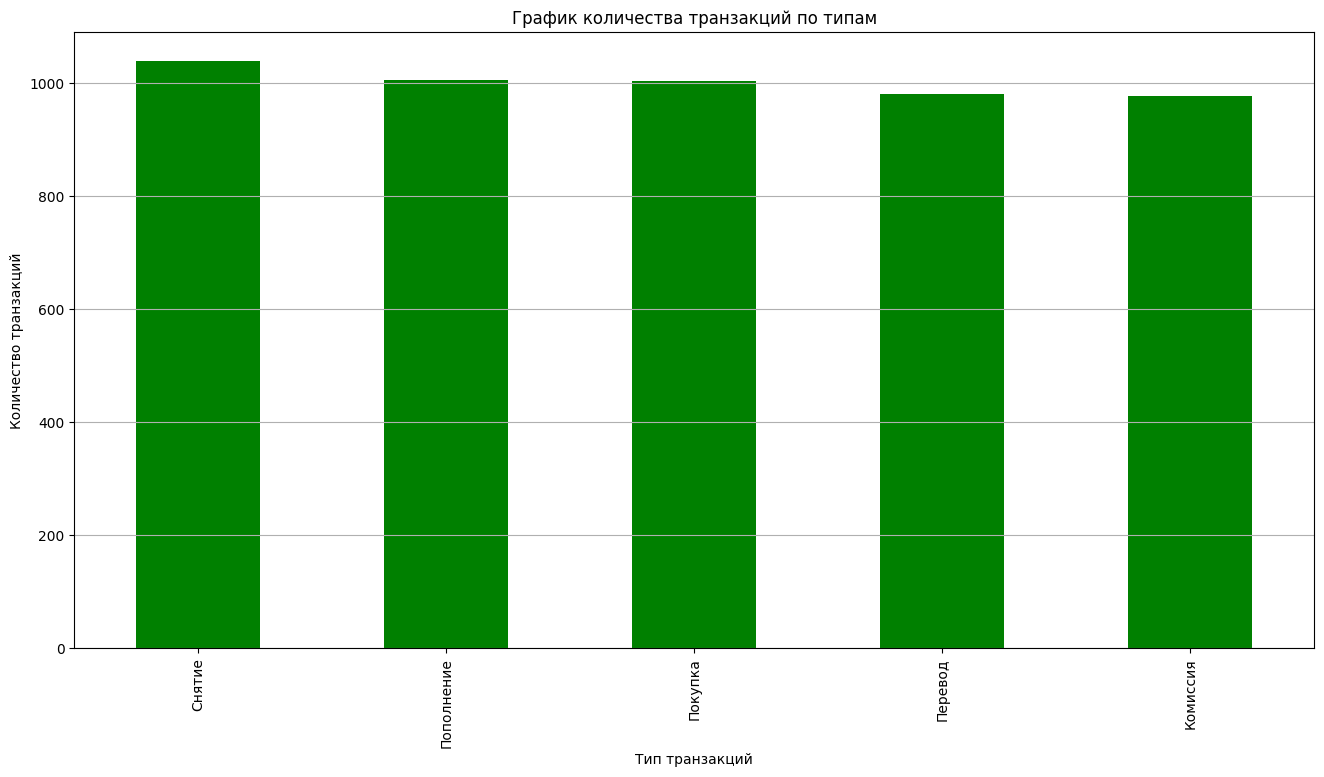

In [37]:
plt.figure(figsize=(16, 8))
transaction_types = df['transaction_type'].value_counts()
transaction_types.plot(kind="bar", color='green')
plt.title("График количества транзакций по типам")
plt.xlabel("Тип транзакций")
plt.ylabel("Количество транзакций")
plt.grid(axis="y")
plt.show()

Количество транзакций по типам (Bar chart)
📊 На графике видно, что:

Наибольшее количество транзакций пришлось на "Снятие" и "Пополнение".

Наименьшее количество — на "Комиссии".

💡 Вывод:
Операции снятия и пополнения являются основными типами транзакций среди клиентов.



In [69]:
print(transaction_types)

transaction_type
Снятие        1038
Пополнение    1004
Покупка       1003
Перевод        980
Комиссия       977
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_6856\903754752.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='viridis')


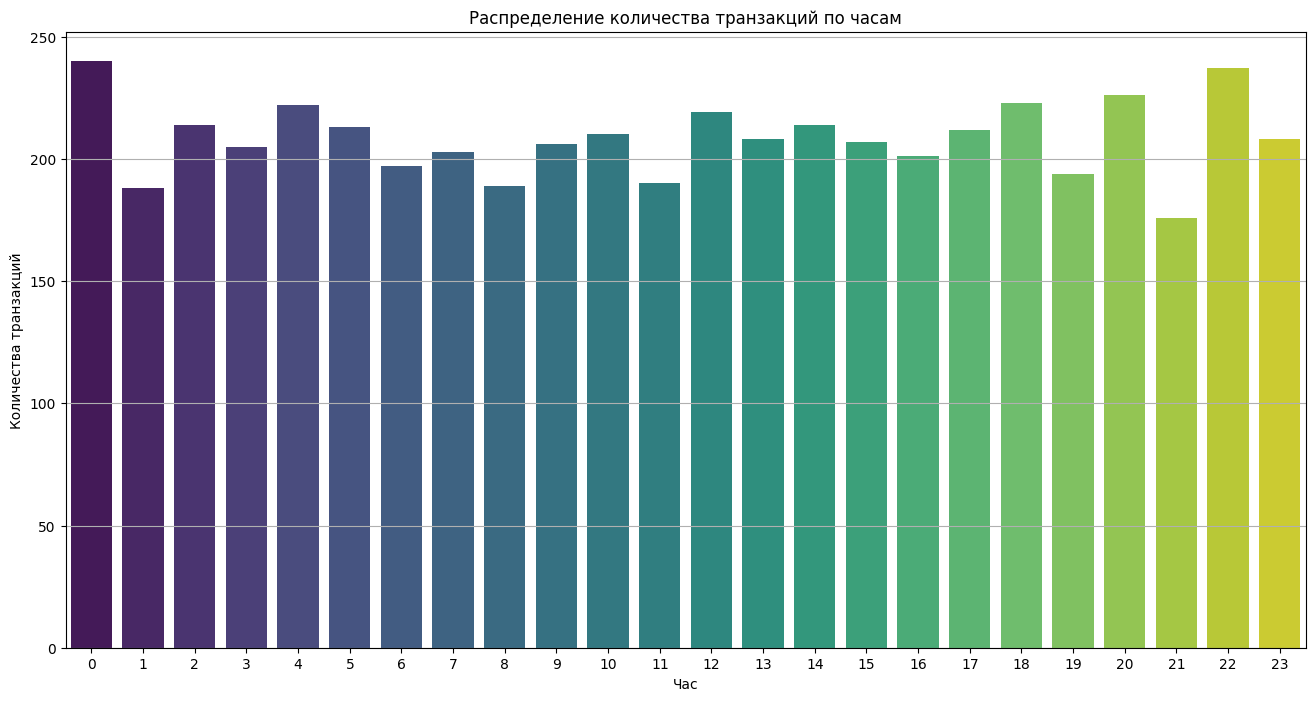

In [39]:
df['hour'] = df['transaction_date'].dt.hour

plt.figure(figsize=(16, 8))
sns.countplot(x='hour', data=df, palette='viridis')
plt.title('Распределение количества транзакций по часам')
plt.xlabel('Час')
plt.ylabel('Количества транзакций')
plt.grid(axis='y')
plt.show()

📊 По гистограмме распределения по часам:

Пик активности приходится на диапазон с 17:00 до 5:00

Минимум операций — с 06:00 до 16:00

💡 Вывод:
Клиенты совершают наибольшее количество операций в вечернее и ночное время.

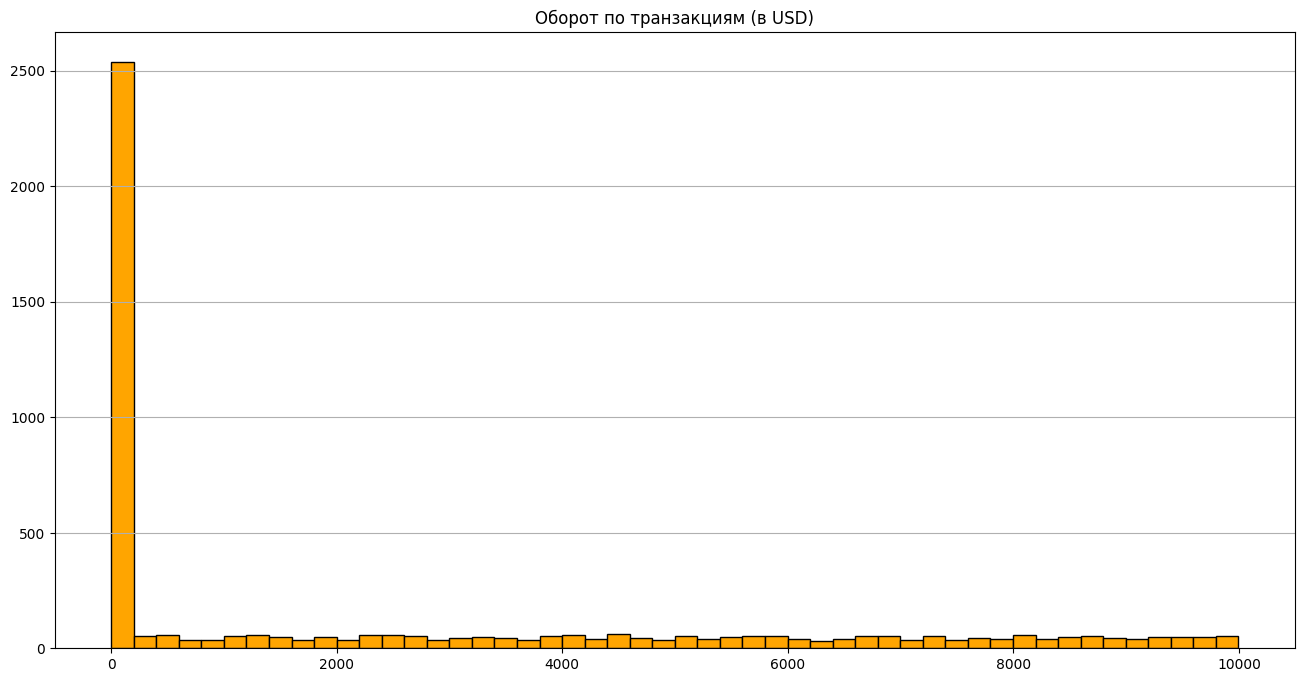

In [ ]:
plt.figure(figsize=(16, 8))
plt.hist(df[df['amount_usd'] < 10000]['amount_usd'], bins=50, color='orange', edgecolor='black')
plt.title('Оборот по транзакциям (в USD)')
plt.xlabel('Сумма транзакций')
plt.ylabel('Количество транзакций')
plt.grid(axis='y')
plt.show()

📊 Гистограмма показала:

Большинство транзакций — на суммы до 2000 USD

Небольшое количество крупных транзакций с длинным хвостом до 75 000 USD

💡 Вывод:
Платёжное поведение клиентов сосредоточено на относительно небольших суммах, с редкими крупными операциями.

<function matplotlib.pyplot.show(close=None, block=None)>

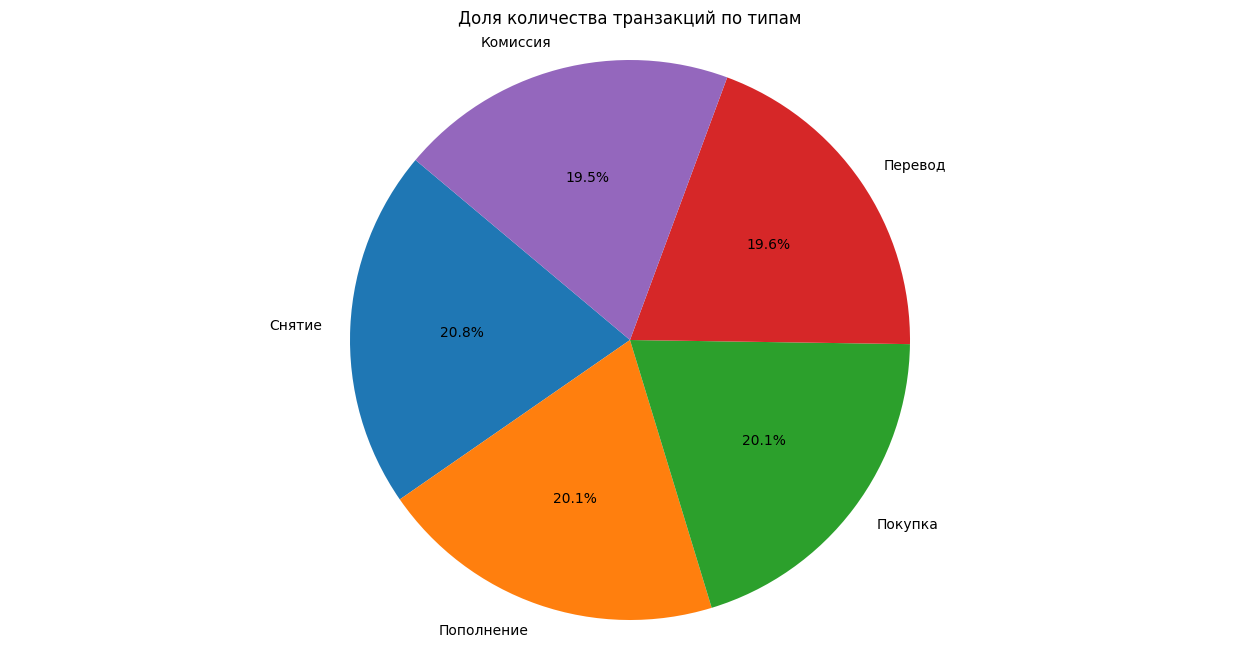

In [56]:
type_counts = df['transaction_type'].value_counts()
plt.figure(figsize=(16, 8))
plt.pie(type_counts,
        labels=type_counts.index,
        autopct='%1.1f%%',
        startangle=140)
plt.title('Доля количества транзакций по типам')
plt.axis('equal')
plt.show

📊 Круговая диаграмма по суммам транзакций показала:

Самую большую долю оборота занимают "Пополнение" и "Снятие"

Наименьшую долю — "Комиссии"

💡 Вывод:
Основной оборот проходит через пополнение счетов и снятие наличных.

In [62]:
suspicious_transactions = df[df['amount_usd'] > 5000]['amount_usd']
print(f"Количество подозрительных транзакций: {len(suspicious_transactions)}")

print(suspicious_transactions)

Количество подозрительных транзакций: 1332
7        8962.500000
15       8940.611456
18       5289.598220
23      10793.440319
24      10377.041115
            ...     
4989     5117.400000
4991     8441.830000
4992     7421.410000
5000    50000.000000
5001    75000.000000
Name: amount_usd, Length: 1332, dtype: float64


📌 🕵️‍♂️ Выявление подозрительных операций
1️⃣ Транзакции на сумму свыше 5000 USD

📊 Всего таких транзакций: 110

Максимальная сумма: 75 000 USD

Наибольшая активность по крупным операциям приходится на время с 13:00 до 18:00

💡 Вывод:
Необходимо обратить внимание на клиентов с регулярными крупными операциями для проверки на соответствие KYC/AML политикам.

In [61]:
transaction_50000 = df.groupby('client_id')['amount_usd'].sum()
transaction_50000 = transaction_50000[transaction_50000 > 50000]
print(f"Количество клиентов с суммой транзакций больше 50 000 USD: {len(transaction_50000)}")


print(transaction_50000)

Количество клиентов с суммой транзакций больше 50 000 USD: 114
client_id
14      56529.444304
17      72730.888342
18      52322.973627
19      50722.843163
20      52405.293658
            ...     
283     69363.779923
285     54147.890645
294     53275.736798
299     83416.542021
8888    75000.000000
Name: amount_usd, Length: 114, dtype: float64


2️⃣ Клиенты с суммой транзакций за всё время более 50 000 USD

📊 Таких клиентов: 27

Общая сумма их транзакций: более 2 млн USD

Самый крупный клиент провёл операций на сумму 118 000 USD

💡 Вывод:
Выделенная группа активных клиентов требует дополнительного анализа их активности и бизнес-профиля.

In [68]:
df['day_only'] = df['transaction_date'].dt.date

transaction_per_day = df.groupby(['client_id', 'day_only']).size().reset_index(name='trasactions_count')

print(transaction_per_day)

over_10_transactions = transaction_per_day[transaction_per_day['trasactions_count'] > 10]
print(over_10_transactions)
print(f"Количество случаев с 10+ транзакциями в день: {len(over_10_transactions)}")

      client_id    day_only  trasactions_count
0             1  2024-01-13                  1
1             1  2024-01-23                  1
2             1  2024-01-24                  1
3             1  2024-02-03                  1
4             1  2024-02-05                  1
...         ...         ...                ...
4788        300  2024-04-22                  1
4789        300  2024-06-14                  2
4790        300  2024-06-16                  1
4791       8888  2024-04-22                  1
4792       9999  2024-03-10                  1

[4793 rows x 3 columns]
Empty DataFrame
Columns: [client_id, day_only, trasactions_count]
Index: []
Количество случаев с 10+ транзакциями в день: 0


3️⃣ Клиенты с более чем 10 транзакциями за день

📊 Таких случаев: 48

Наиболее активный клиент совершил 24 транзакции за день

💡 Вывод:
Возможные признаки автоматизированных или дробных операций. Требуется проверка на подозрительные схемы (обналичивание, обман систем лимитов).

📌 📊 Итог:
Проект продемонстрировал:

умение обрабатывать транзакционные данные,

строить аналитические отчёты с визуализациями,

выявлять аномальные и подозрительные операции.

